## Get data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

#!pip install keras
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#!pip install fbprophet
#!pip install tqdm
from fbprophet import Prophet
from tqdm import tqdm

#!pip install imapclient
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from fbprophet import Prophet
import imapclient
import pandas as pd

Using TensorFlow backend.


In [2]:
#Get Data
df2 = pd.read_csv('tick.csv')

#Rename two columns I needed
df2.rename(columns={'3':'Dates'},inplace=True)
df2.rename(columns={'17':'Tick_Street_Name'},inplace=True)

#convert date into datetime type 
df2['date_column'] = pd.to_datetime(df2['Dates'],format ='%m/%d/%Y')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# #Getting data for Mission Street only 
#7052 null values in MISSION STREET

#df2[df2['Tick_Street_Name'] == 'GEARY']

In [8]:
street_count = df2.groupby(["Tick_Street_Name","year_daily"]).size()

In [9]:
street_count.iloc[300]

22

In [10]:
Mission_street = street_count.loc['MISSION']

In [3]:
#create a new column 'daily'
df2['daily'] = df2['date_column'].apply(lambda x: pd.Timestamp(x).day)
df2['daily'].max()

df2['daily'] = df2['daily'].apply(int).apply(str)

#create a new column 'year'
df2['year'] = df2['date_column'].apply(lambda x: pd.Timestamp(x).year)
df2['year'] = df2['year'].apply(int).apply(str)

#create a new column 'month'
df2['month'] = df2['date_column'].apply(lambda x: pd.Timestamp(x).month)
df2['month'] = df2['month'].apply(int).apply(str)

In [4]:
#check the largest month
max(df2['month'], key=(lambda x: int(x)))

'12'

In [5]:
#combined year and month and weekly to get daily per year
df2['year_daily']= df2['year'] + '-' + df2['month'] + '-' + df2['daily']
#count all the values daily per year
data_daily = df2['year_daily'].value_counts().sort_index()

In [6]:
#sum of counts of tickets
print(len(data_daily))

792


In [7]:
#reasign another variable for "putting together" graph problem
day = df2['year_daily']
day.head()

0    2016-7-1
1    2016-7-1
2    2016-7-1
3    2016-7-1
4    2016-7-1
Name: year_daily, dtype: object

## Baseline Model

In [11]:
test_split = int(len(data_daily) * 0.8)

pred_base = []
for i in range(len(data_daily) - test_split):
    train_data = data_daily[i : test_split + i]

    test_data = data_daily.iloc[test_split + i]
   
    train_data_day = (
        train_data.values.sum() / train_data.count()
    )
    
    #baseline_prediction = train_data_day[:test_data]
    pred_base.append(train_data_day)
    
test_data = data_daily[test_split:]

mse_baseline = mean_squared_error(test_data.values, pred_base)

print("RMSE for BASELINE {:.2f}".format(np.sqrt(mse_baseline)))

RMSE for BASELINE 1504.22


In [12]:
print(len(train_data))

633


## Baseline for mission street

In [13]:

test_split = int(len(Mission_street) * 0.8)

pred_base = []
for i in range(len(Mission_street) - test_split):
    train_data = Mission_street[i : test_split + i]

    test_data = Mission_street.iloc[test_split + i]
   
    train_data_day = (
        train_data.values.sum() / train_data.count()
    )
    
    #baseline_prediction = train_data_day[:test_data]
    pred_base.append(train_data_day)
    
test_data = Mission_street[test_split:]

mse_baseline = mean_squared_error(test_data.values, pred_base)

print("RMSE for BASELINE {:.2f}".format(np.sqrt(mse_baseline)))

RMSE for BASELINE 43.68


## Keras LSTM Model

Instructions for updating:
Colocations handled automatically by placer.


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Train on 633 samples, validate on 152 samples
Epoch 1/15
 - 1s - loss: 0.1273 - val_loss: 0.0760
Epoch 2/15
 - 1s - loss: 0.0959 - val_loss: 0.0714
Epoch 3/15
 - 1s - loss: 0.0909 - val_loss: 0.0655
Epoch 4/15
 - 1s - loss: 0.0831 - val_loss: 0.0556
Epoch 5/15
 - 1s - loss: 0.0763 - val_loss: 0.0540
Epoch 6/15
 - 1s - loss: 0.0717 - val_loss: 0.0463
Epoch 7/15
 - 1s - loss: 0.0703 - val_loss: 0.0460
Epoch 8/15
 - 1s - loss: 0.0694 - val_loss: 0.0457
Epoch 9/15
 - 1s - loss: 0.0676 - val_loss: 0.0457
Epoch 10/15
 - 1s - loss: 0.0667 - val_loss: 0.0456
Epoch 11/15
 - 1s - loss: 0.0681 - val_loss: 0.0453
Epoch 12/15
 - 1s - loss: 0.0684 - val_loss: 0.0452
Epoch 13/15
 - 1s - loss: 0.0669 - val_loss: 0.0452
Epoch 14/15
 - 1s - loss: 0.0655 - val_loss: 0.0448
Epoch 15/15
 - 1s - loss: 0.0675 - val_loss: 0.0459


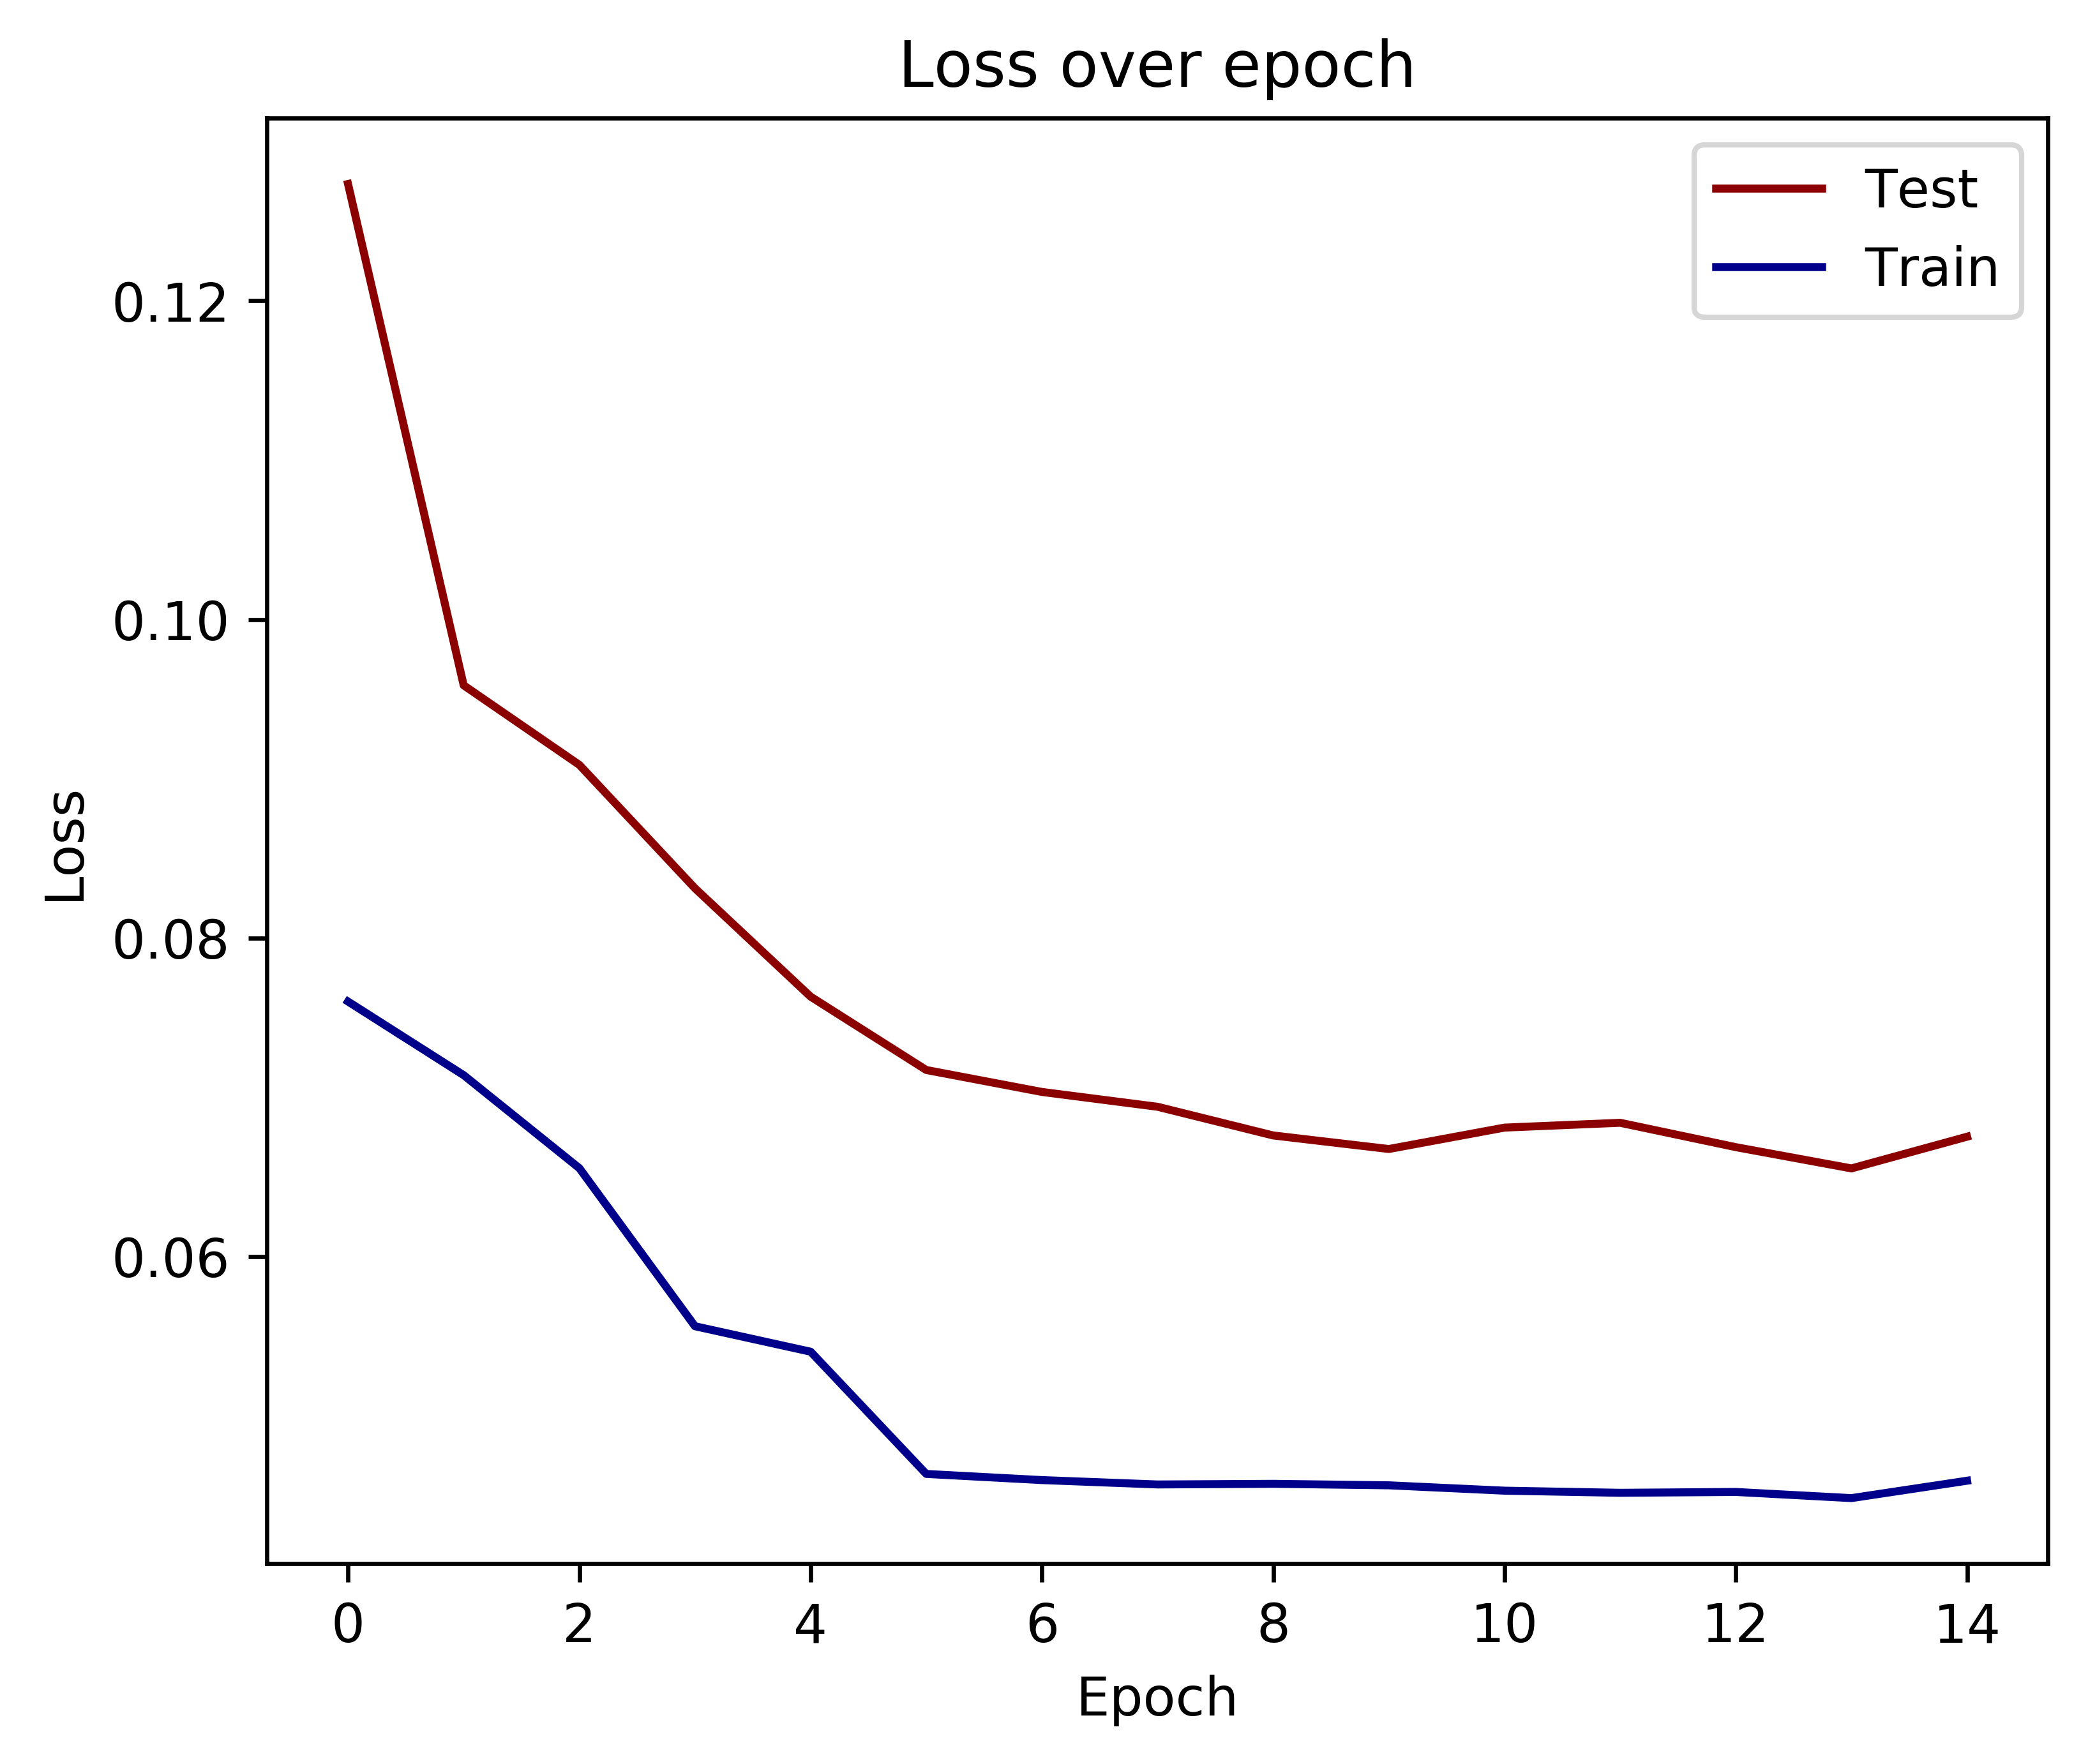

[[2331.448 ]
 [3966.8552]
 [4216.3936]
 [4221.664 ]
 [3775.934 ]
 [3074.463 ]
 [3059.796 ]
 [4688.533 ]
 [4711.0435]
 [4272.314 ]
 [3508.4243]
 [2675.9739]
 [2560.5173]
 [3038.476 ]
 [3848.0808]
 [4846.5903]
 [4976.932 ]
 [4487.186 ]
 [3929.6875]
 [3081.1453]
 [2652.483 ]
 [3518.0671]
 [4700.117 ]
 [4724.7095]
 [4599.0625]
 [3902.3215]
 [3012.697 ]
 [2602.9307]
 [3495.2607]
 [4541.9844]
 [5031.0337]
 [4586.303 ]
 [3658.4631]
 [2805.307 ]
 [3025.9963]
 [4696.997 ]
 [4925.638 ]
 [4463.7314]
 [3682.4705]
 [2982.4683]
 [2530.6067]
 [3852.1978]
 [3739.818 ]
 [4633.946 ]
 [4432.6753]
 [3955.453 ]
 [3203.652 ]
 [3007.2395]
 [2378.314 ]
 [3590.8318]
 [4661.417 ]
 [5352.9214]
 [5061.1567]
 [4134.141 ]
 [3320.142 ]
 [3038.3718]
 [2936.806 ]
 [3809.2322]
 [4886.045 ]
 [4609.135 ]
 [4228.3843]
 [3579.8945]
 [2671.0247]
 [3416.5432]
 [4387.8486]
 [4370.192 ]
 [4030.5066]
 [3488.7117]
 [2752.8862]
 [3493.7764]
 [4530.168 ]
 [4856.6685]
 [4277.2646]
 [4379.358 ]
 [3796.3972]
 [3412.2808]
 [3205.5332]

In [15]:
#predicting total number of parking ticket weekly, window_size=7

def get_window_data(data, window):
    # Get window data and scale
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data_daily.reshape(-1, 1))

    X = []
    y = []

    for i in range(len(data) - window):
        X.append(data[i : i + window])
        y.append(data[i + window])

    X = np.asarray(X)
    y = np.asarray(y)
    return X, y, scaler

window_size = 7
X, y, scaler = get_window_data(data_daily, window_size)

X_train = X[:test_split]
X_test = X[test_split:]

y_train = y[:test_split]
y_test = y[test_split:]

model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(
    X_train, # Features
    y_train, # Target
    epochs=15, # Number of epochs
    batch_size=7, # Number of observations per batch
    validation_data=(X_test, y_test), # Data for evaluation
    verbose=2, # 2 output
    shuffle= False
)

# Plot training & validation loss values
plt.figure(figsize=(6, 5), dpi=600)
plt.plot(history.history["loss"], 'darkred', label="Test")
plt.plot(history.history["val_loss"], 'darkblue', label="Train")
plt.title("Loss over epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

predict = scaler.inverse_transform(model.predict(X_test))
mse_lstm = mean_squared_error(
    scaler.inverse_transform(y_test),
    predict,
)
print(predict)
print("RMSE for LSTM {:.2f}".format(np.sqrt(mse_lstm)))
#print(model.summary())

## LSTM Keras for Mission Street

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 633 samples, validate on 152 samples
Epoch 1/7
 - 1s - loss: 0.0515 - val_loss: 0.0300
Epoch 2/7
 - 0s - loss: 0.0288 - val_loss: 0.0223
Epoch 3/7
 - 0s - loss: 0.0264 - val_loss: 0.0190
Epoch 4/7
 - 0s - loss: 0.0255 - val_loss: 0.0221
Epoch 5/7
 - 0s - loss: 0.0210 - val_loss: 0.0210
Epoch 6/7
 - 0s - loss: 0.0214 - val_loss: 0.0209
Epoch 7/7
 - 0s - loss: 0.0196 - val_loss: 0.0197


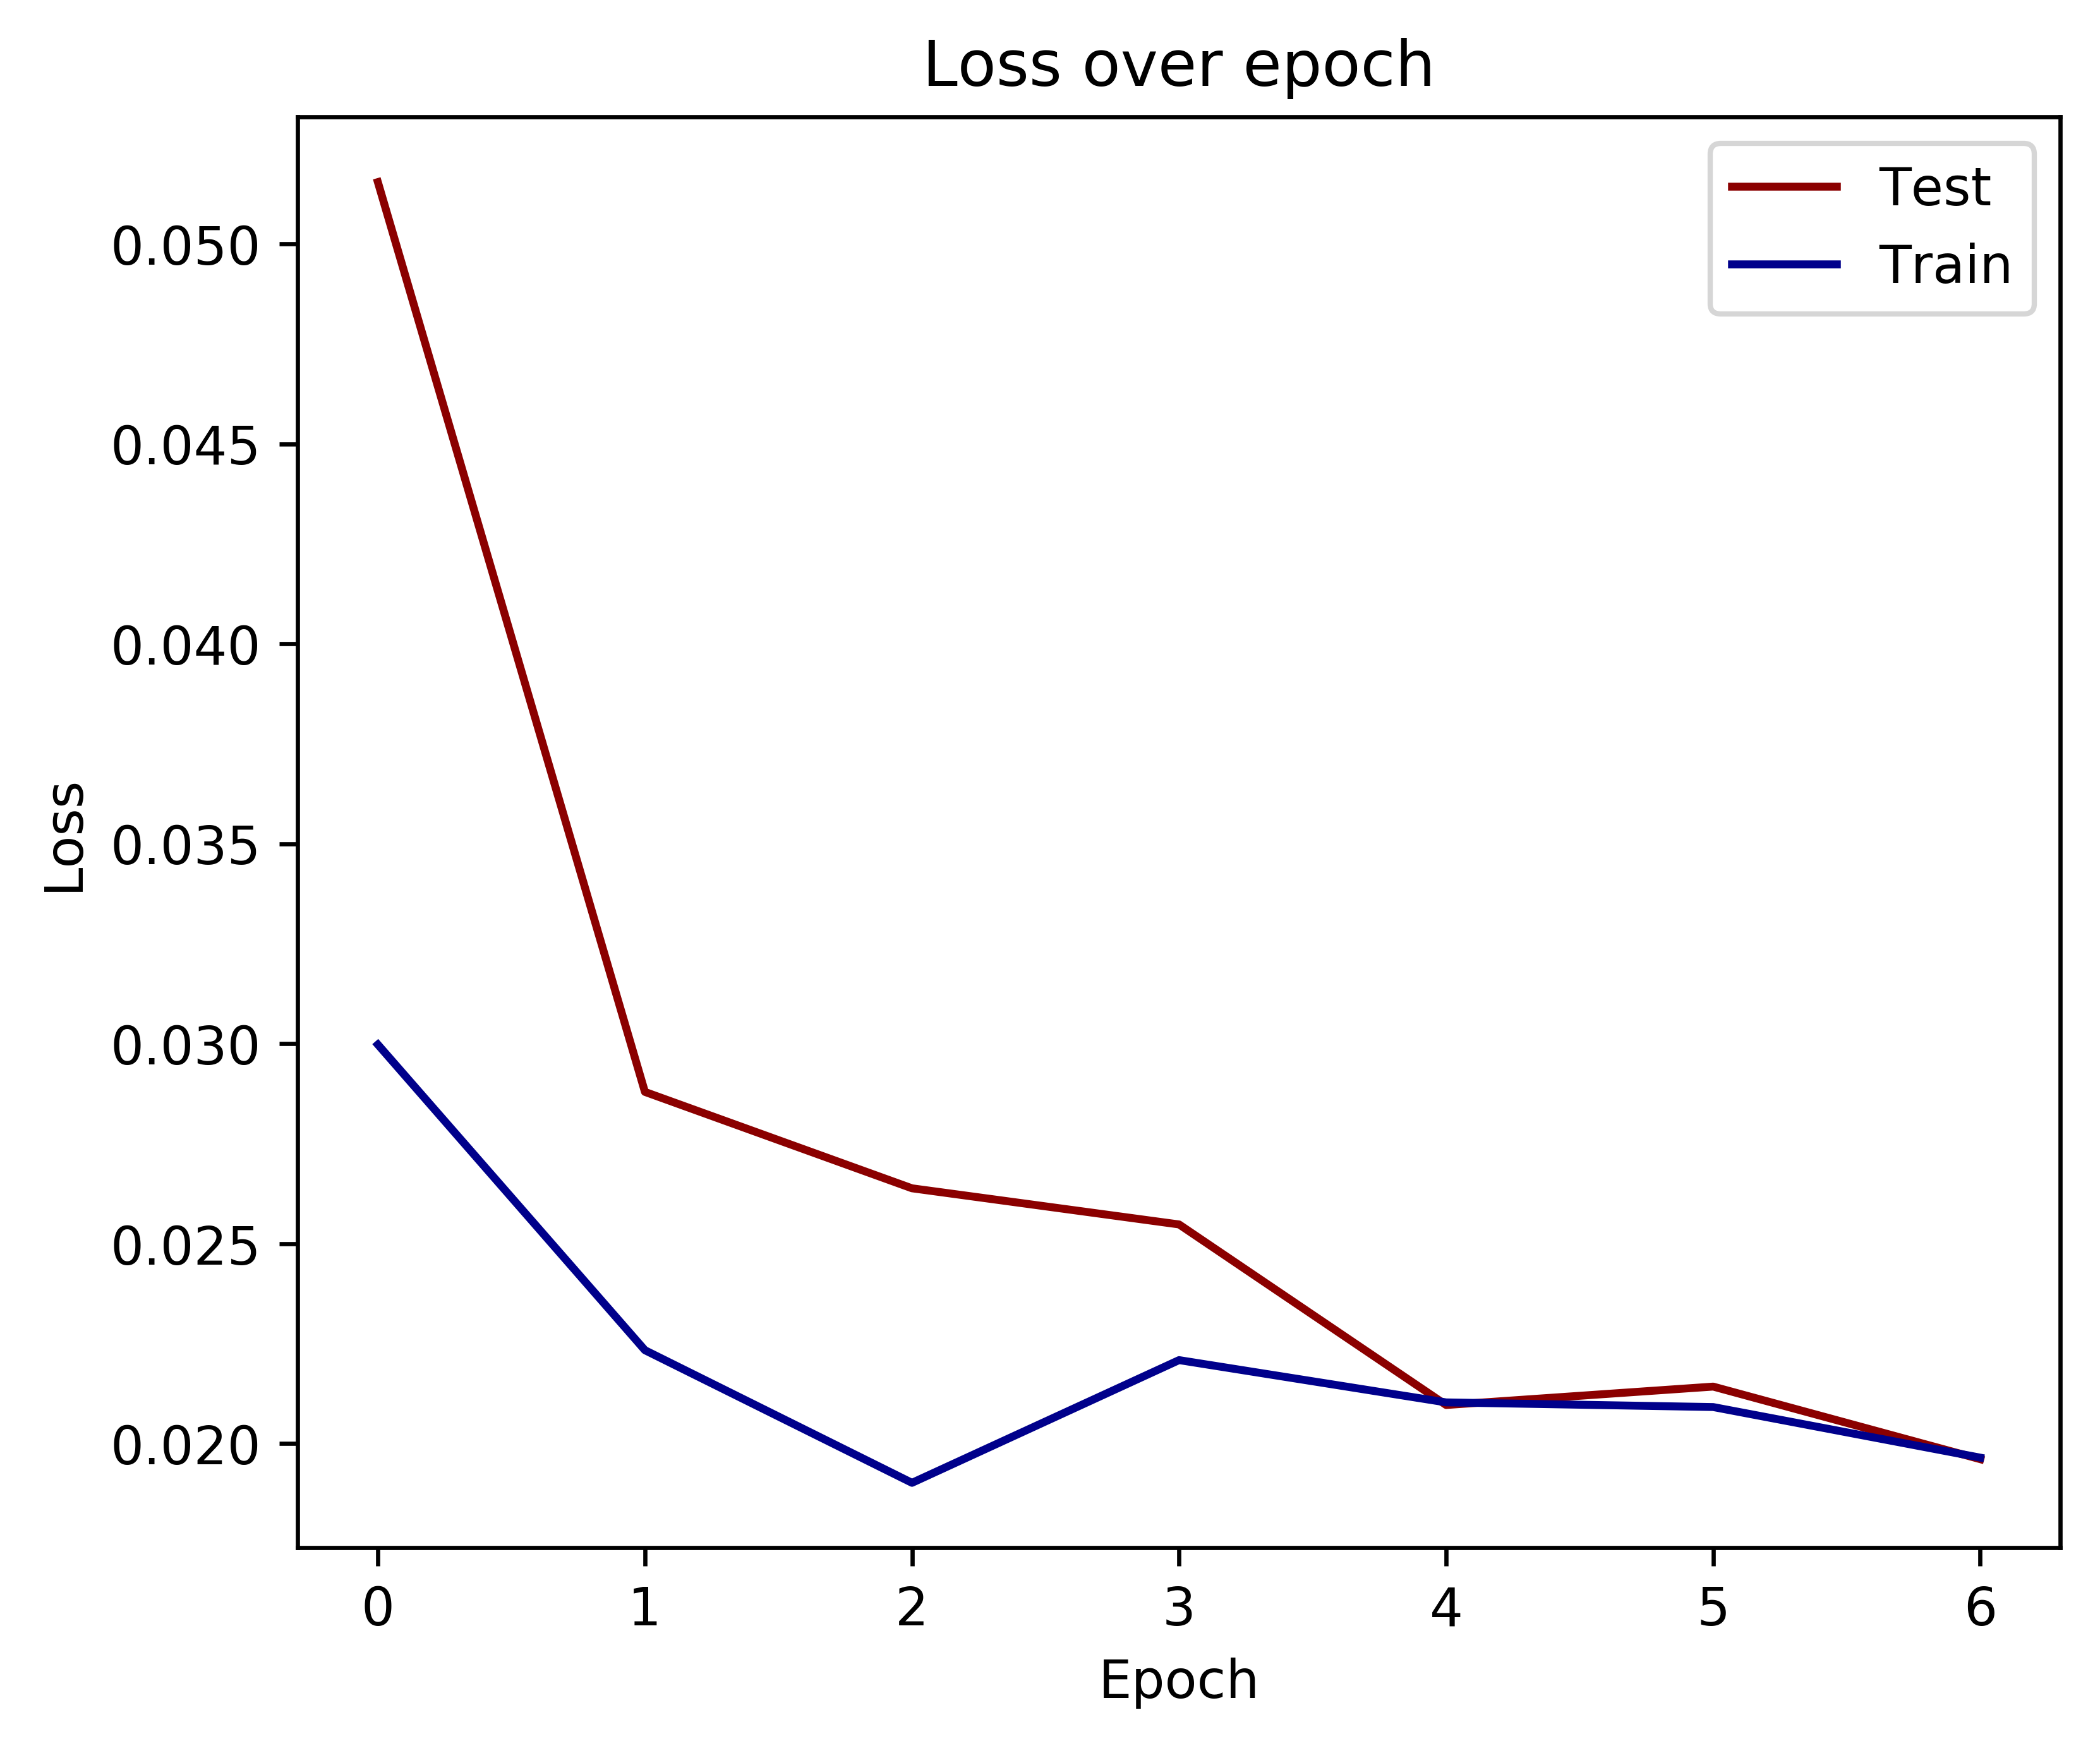

[[131.96352 ]
 [130.77791 ]
 [128.25961 ]
 [125.64224 ]
 [121.5411  ]
 [118.372536]
 [115.17719 ]
 [113.67767 ]
 [112.77369 ]
 [114.3269  ]
 [115.882866]
 [116.153915]
 [117.33007 ]
 [117.26315 ]
 [115.941376]
 [115.07299 ]
 [114.941216]
 [115.51521 ]
 [118.46189 ]
 [121.555115]
 [123.53348 ]
 [122.63379 ]
 [120.00573 ]
 [118.39425 ]
 [118.12786 ]
 [116.6407  ]
 [116.632225]
 [117.75504 ]
 [117.327736]
 [115.88468 ]
 [115.56309 ]
 [115.4982  ]
 [116.28352 ]
 [116.30895 ]
 [115.40057 ]
 [115.80233 ]
 [115.1865  ]
 [117.344   ]
 [119.554886]
 [120.35175 ]
 [120.128716]
 [118.695694]
 [115.12239 ]
 [113.67648 ]
 [111.46556 ]
 [113.89635 ]
 [116.3525  ]
 [119.87118 ]
 [120.647255]
 [120.275085]
 [116.86239 ]
 [118.75827 ]
 [119.01423 ]
 [119.36975 ]
 [119.50514 ]
 [122.8329  ]
 [125.126366]
 [121.92827 ]
 [117.370705]
 [120.05671 ]
 [122.671005]
 [122.729   ]
 [119.75499 ]
 [118.78474 ]
 [118.370056]
 [116.2169  ]
 [115.42536 ]
 [118.94909 ]
 [121.63688 ]
 [122.86803 ]
 [122.09438 ]
 [121.

In [17]:
#predicting total number of parking ticket weekly, window_size=7

def get_window_data(data, window):
    # Get window data and scale
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(Mission_street.reshape(-1, 1))

    X = []
    y = []

    for i in range(len(data) - window):
        X.append(data[i : i + window])
        y.append(data[i + window])

    X = np.asarray(X)
    y = np.asarray(y)
    return X, y, scaler

window_size = 7
X, y, scaler = get_window_data(Mission_street, window_size)

X_train = X[:test_split]
X_test = X[test_split:]

y_train = y[:test_split]
y_test = y[test_split:]

model = Sequential()
model.add(LSTM(92, input_shape=(window_size, 1)))
model.add(Dropout(0.93))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(
    X_train, # Features
    y_train, # Target
    epochs=7, # Number of epochs
    batch_size=10, # Number of observations per batch
    validation_data=(X_test, y_test), # Data for evaluation
    verbose=2, # 2 output
    shuffle= False
)

# Plot training & validation loss values
plt.figure(figsize=(6, 5), dpi=600)
plt.plot(history.history["loss"], 'darkred', label="Test")
plt.plot(history.history["val_loss"], 'darkblue', label="Train")
plt.title("Loss over epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

predict2 = scaler.inverse_transform(model.predict(X_test))
mse_lstm = mean_squared_error(
    scaler.inverse_transform(y_test),
    predict2,
)
print(predict2)
print("RMSE for LSTM {:.2f}".format(np.sqrt(mse_lstm)))
#print(model.summary())

## Prediction for Mission Street Parking Ticket

Text(0,0.5,'Ticket Count')

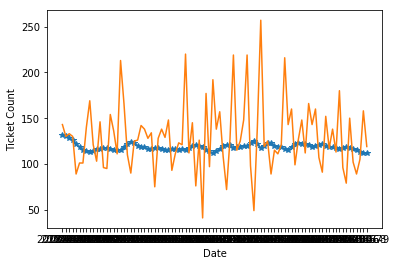

In [43]:
# print(len(predict2)) 
# #print(len(Mission_street))
# Mission = Mission_street[640:]
# Mission.size
plt.plot(predict2[:90], '-*')
plt.plot(Mission[:90])
plt.xlabel('Date')
plt.ylabel('Ticket Count')

### The Loss over Epoch graph shows Training data is to be more fit with real data, thus showing lower loss score. Testing data are less fit with real data, thus high loss score.

## Prophet Model

In [21]:
sub_data = data_daily[:1000]

In [22]:
prophet_data = sub_data.reset_index()

prophet_data["ds"] = prophet_data['index']
#daily
prophet_data["y"] = prophet_data['year_daily']
#number of tickets
prophet_data = prophet_data.drop(['index', 'year_daily'], axis=1)

pred = []
for i in tqdm(range(len(sub_data) - test_split)):

    data_to_fit = prophet_data[: (test_split + i)]
    
    prophet_model = Prophet(interval_width=0.95)

    prophet_model.fit(data_to_fit)

    prophet_forecast = prophet_model.make_future_dataframe(periods=1, freq="d")
    prophet_forecast = prophet_model.predict(prophet_forecast)

    pred.append(prophet_forecast)


mse_prophet = mean_squared_error(test_data.values, pred)

# print("RMSE for PROPHET {:.2f}".format(np.sqrt(mse_prophet)))
# RMSE for PROPHET 3778.00

  0%|          | 0/159 [00:00<?, ?it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
  1%|          | 1/159 [00:02<07:00,  2.66s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
  1%|▏         | 2/159 [00:05<06:57,  2.66s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
  2%|▏         | 3/159 [00:07<06:55,  2.66s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override th

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
 21%|██        | 33/159 [01:29<05:42,  2.72s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
 21%|██▏       | 34/159 [01:32<05:40,  2.72s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
 22%|██▏       | 35/159 [01:35<05:43,  2.77s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
 23%|██▎       | 36/159 [01:37<05:39,  2.76s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to

 41%|████      | 65/159 [02:58<04:24,  2.81s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
 42%|████▏     | 66/159 [03:00<04:19,  2.79s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
 42%|████▏     | 67/159 [03:03<04:15,  2.78s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
 43%|████▎     | 68/159 [03:06<04:11,  2.76s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
 95%|█████████▍| 151/159 [07:21<00:26,  3.26s/it]INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


100%|██████████| 159/159 [07:47<00:00,  3.25s/it]


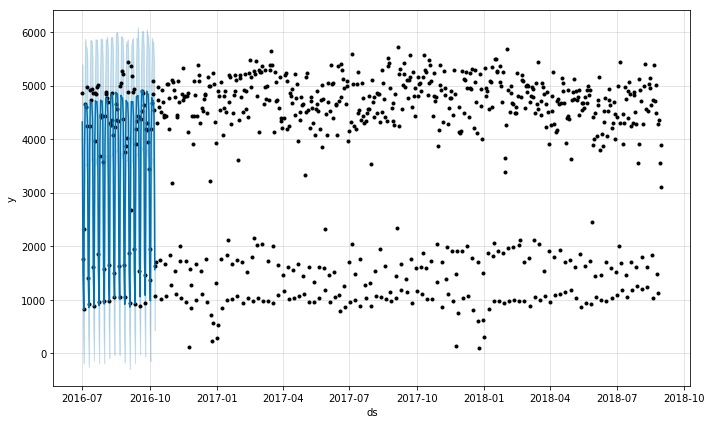

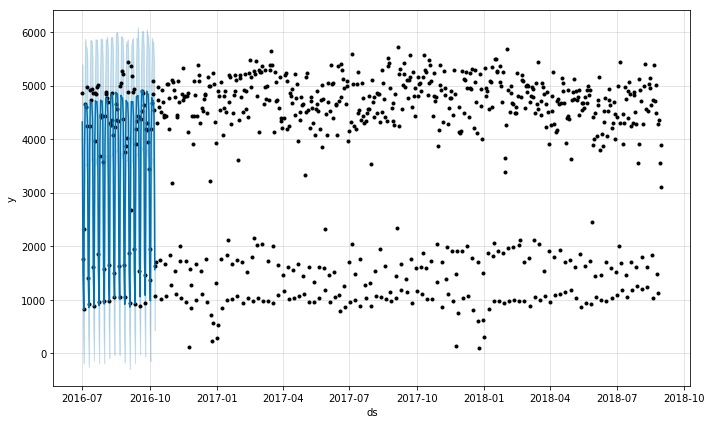

In [23]:
prophet_model.plot(prophet_forecast[:100])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


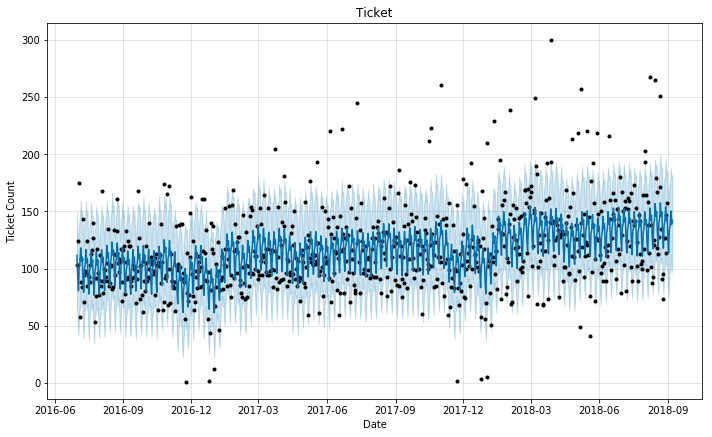

In [24]:
import fbprophet

prophet_data = Mission_street[:900].reset_index()

prophet_data["ds"] = prophet_data['year_daily'] #daily
prophet_data["y"] = prophet_data[0]
#number of tickets
prophet_data = prophet_data.drop(['year_daily', 0], axis=1)

# Make the prophet model 
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)

# fit model on our data
gm_prophet.fit(prophet_data)


# Make a future dataframe for 2 years
gm_forecast = gm_prophet.make_future_dataframe(periods=1*7, freq='d')

# Make predictions
gm_forecast = gm_prophet.predict(gm_forecast)

gm_prophet.plot(gm_forecast, xlabel ='Date', ylabel = 'Ticket Count')
plt.title('Ticket');


### Given all the learned parameters from train data, we are using them to predict on all the test sequences one at a time.

In [18]:
#for performance_metrics exploration 
from fbprophet.diagnostics import performance_metrics
prophet_model.plot_components(prophet_forecast)

NameError: name 'prophet_model' is not defined

## Exploration: Putting it all together

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


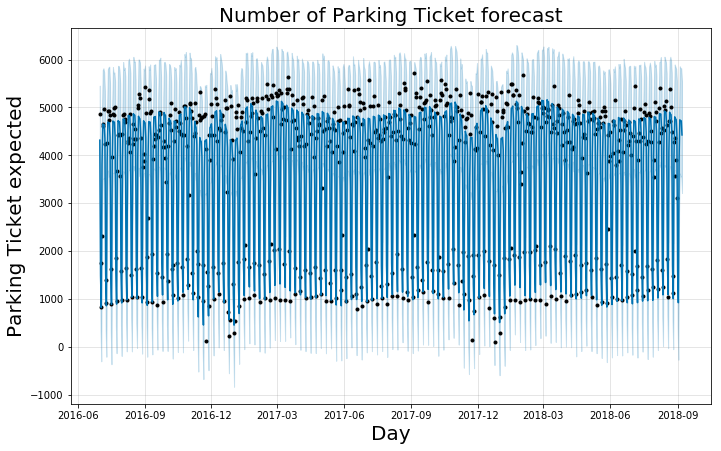

In [62]:
prophet_model = Prophet(interval_width=0.95)

prophet_data = data_daily[:100].reset_index()
prophet_data["ds"] = prophet_data['index'] #daily
prophet_data["y"] = prophet_data['year_daily'] #number of tickets
prophet_data = prophet_data.drop(['index', 'year_daily'], axis=1)

prophet_model.fit(prophet_data)

prophet_forecast = prophet_model.make_future_dataframe(periods=7, freq="d")
prophet_forecast = prophet_model.predict(prophet_forecast)

fig1 = prophet_model.plot(prophet_forecast)

#plt.xlim([datestart, dateend])
plt.title("Number of Parking Ticket forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("Parking Ticket expected", fontsize=20)
#plt.axvline(data_daily[791], color="k", linestyle=":")
plt.show()

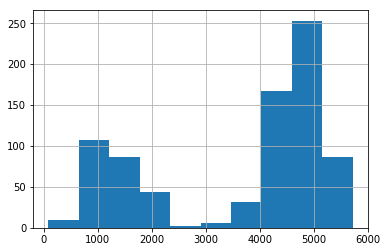

In [18]:
#Hist of data_daily
data_daily.hist()

In [ ]:

#we now plot predictions from the network
# plt.figure(figsize=(16, 7))
# plt.title('Ticket Counts from Jun. 2016 to Jul. 2018')
# plt.xlabel('Daily')
# plt.ylabel('Scaled Number of Tickets')
# plt.plot(scaled_data, label='Original data')
# plt.plot(sup, label='Training data')
# plt.plot(test_results, label='Testing data')
# plt.legend()
# plt.show()

# one for prophet oneplot 
# one for LSTM oneplot
#len(pred), len(data_daily), len(test_data)